# Loan Application Status Prediction:

Submitted by **POOJA C** Batch no:1831.

**STATEMENT: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.**

# Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv("loanprediction.csv") #Reading csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Above is the dataset of this perticular problem.And i have to predict wheather the loan will be approved or not so Loan_Status is my target columns and the data type is categorical so it's a **classification problem**.

# Preprocessing and EDA:

In [3]:
#Checking shape of dataset
df.shape

(614, 13)

In this perticular dataset i have 614 rows and 13 columns.

In [4]:
#Checking all column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Above are the list of column names in the dataset.

In [5]:
#Checking the data types of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In this perticular dataset i have 3 types of columns int type,float type and object type.

In [6]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns and i have to replace those null values.

In [7]:
#Checking unique values of each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Above are the unique value count of each column in the dataset.

In [8]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

LP001824    1
LP001792    1
LP001882    1
LP001384    1
LP002587    1
           ..
LP001963    1
LP002979    1
LP002201    1
LP002277    1
LP001664    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************
Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************
0.0       273
1666.0      5
2083.0      5
2500.0      5
1

Above are the value counts of each column and in LoanID column all the values are unique so no need to keep this column,in CoapplicantIncome column there is about 45% zeros i have to replace that.

In [9]:
#Droping Loan_ID column
df = df.drop(["Loan_ID"],axis=1)

In [10]:
#Checking for skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Since i have skewness in CoapplicantIncome column i have replace zero with median.

In [11]:
#Replacing zeros in CoapplicantIncome by median
df["CoapplicantIncome"].replace(0, df["CoapplicantIncome"].median(),inplace = True)

In [12]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [13]:
#Checking null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.And i have to replace these null values using imputation technique.

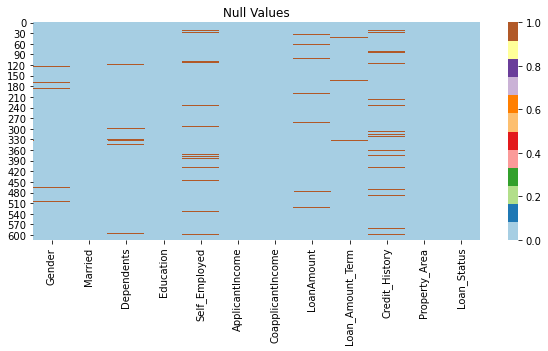

In [14]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

By visualization i can notice the null values.

# Imputation technique to replace NaN values:

There is skewness in all the numerical column so i can not replace the NaN values with mean i have replace it with median.

In [15]:
#Replacing NaN values in numerical columns
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

Replaced the null values in numerical columns by there median.

In [16]:
#Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

Replaced the null values in categorical columns by there mode.

In [17]:
#Again checking the NaN values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now all the null values has been removed.

In [18]:
#Checking unique values of target column
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In my target column i have only two unique values so it's a binary classification.

In [19]:
#Checking for empty observations
df.loc[df['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There is no empty observations in my target column.

In [20]:
#Checking description of data set
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2149.683094,145.752443,342.410423,0.855049
std,6109.041673,2682.545729,84.107233,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1188.500000,100.250000,360.000000,1.000000
50%,3812.500000,1199.250000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- The mean value and 2nd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.
- The count is same which means no null values.
- Minimum loan term is 12.
- Minimum loan amount is 9.

# Visualization:

# Univariate Analysis:

In [21]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Above are the list of categorical columns.

In [22]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Above are the list of numerical columns.

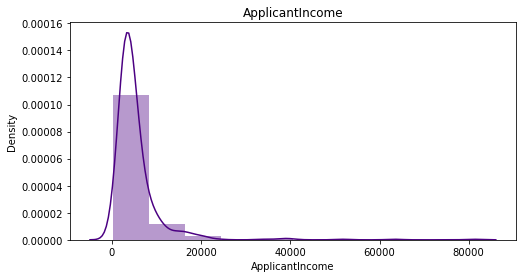

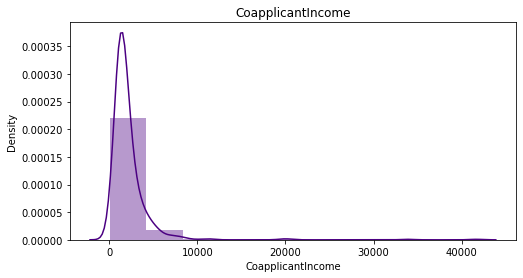

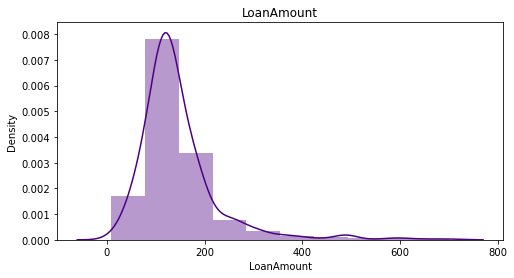

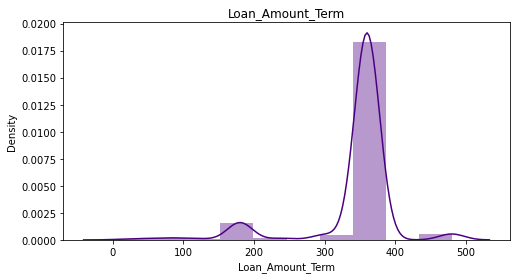

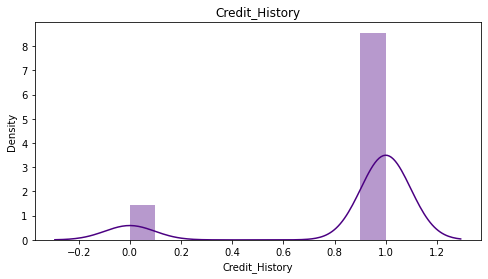

In [23]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

All the numerical columns are skewed.

In [24]:
#Checking the value counts of Gender column
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

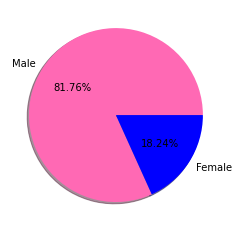

In [25]:
#Ploting pie chart for Gender
labels='Male','Female'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts(), labels=labels,colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the applicants are males.

In [26]:
#Checking the value counts of Married column
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

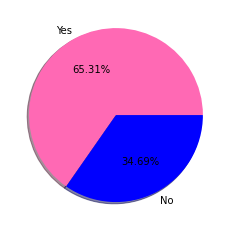

In [27]:
#Ploting pie chart for Married
labels='Yes','No'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Married'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are married.

In [28]:
#Checking the value counts of Education column
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

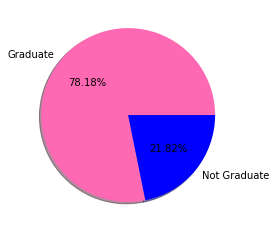

In [29]:
#Ploting pie chart for Education
labels='Graduate','Not Graduate'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are Graduated very less applicants are not graduated.

In [30]:
#Checking the value counts of Self_Employed column
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

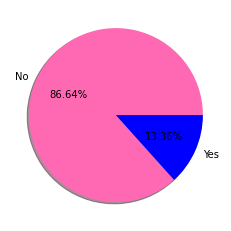

In [31]:
#Ploting pie chart for Self_Employed
labels='No','Yes'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are not self employed.

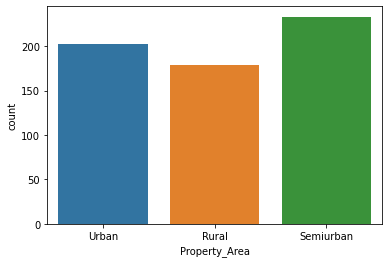

In [32]:
#Count plot for Property_Area
sns.countplot(df['Property_Area']);

Most of the loan applicants are having property in Semiurban are and very less people have property in Rural area.

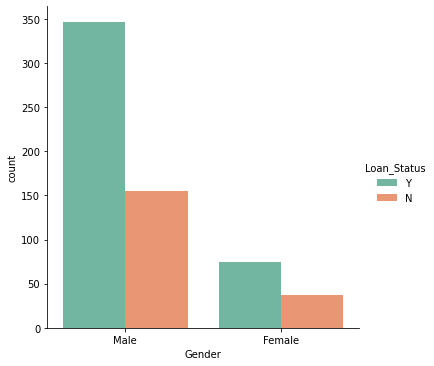

In [33]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Male applicants has more chance of getting approved loan.

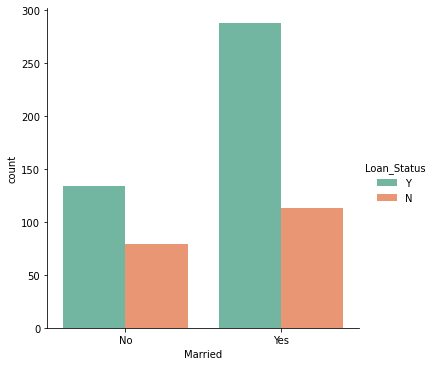

In [34]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Married people has more chance of getting loan approved.

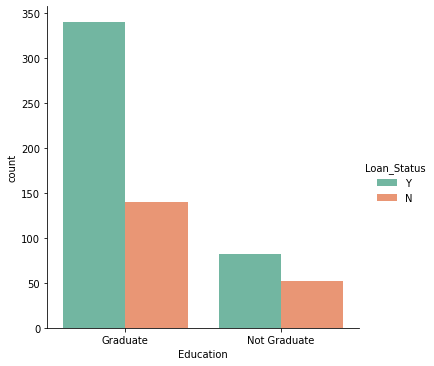

In [35]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Graduated people has more chance of getting loan approved.

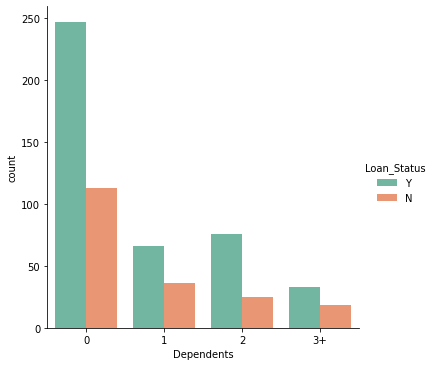

In [36]:
#Factor plot for Dependents
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Applicants with 0 dependents has more chance of getting loan approved.

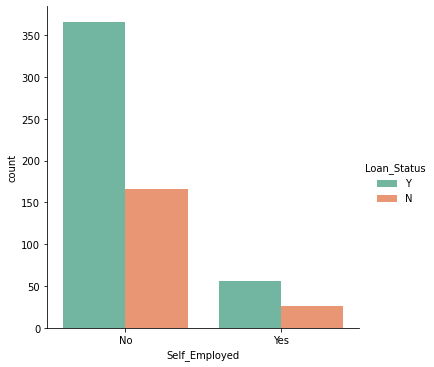

In [37]:
#Factor plot for Self_Employed
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

The applicants who are not self employed has more chance of getting loan approved.

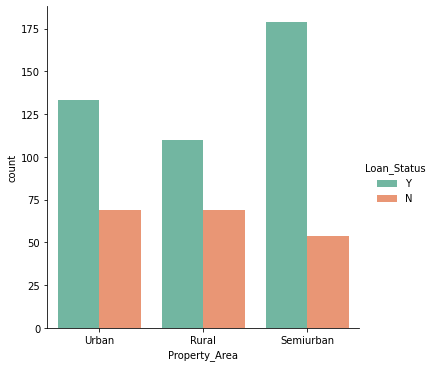

In [38]:
#Factor plot for Property_Area
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Applicants having property in semiurban area has more chance of getting loan approved.

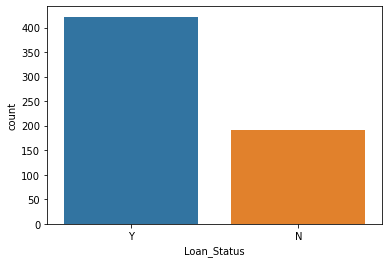

In [39]:
#Count plot for Loan_Status
sns.countplot(df['Loan_Status']);

By looking into the count plot of target column i can say that the data is imbalanced and i need to balance it.

# Bivariate Analysis:

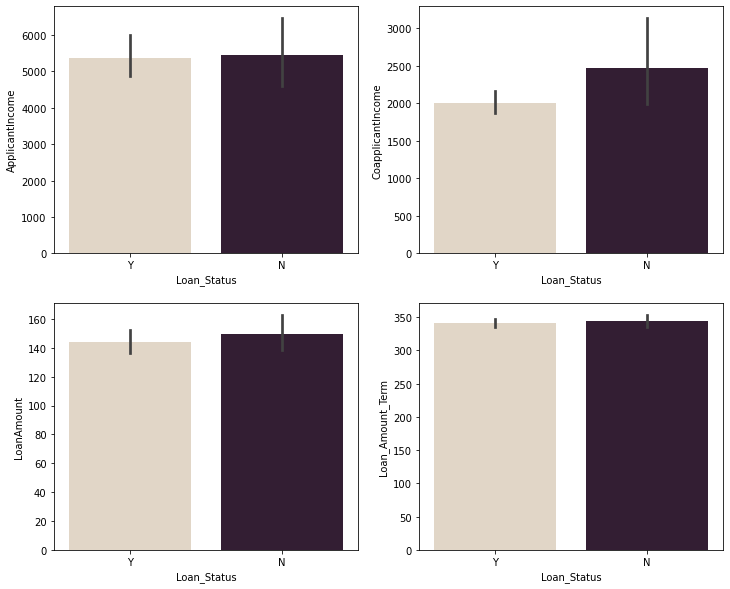

In [40]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

- Based on applicant income the loan status has 50-50 of approval.
- If the coapplicant income is about 2000 then the chance is more of getting loan approved.
- Loan ammount and loan status also has 50% chance of approval.
- For all loan amount term the chance of approval is also same.

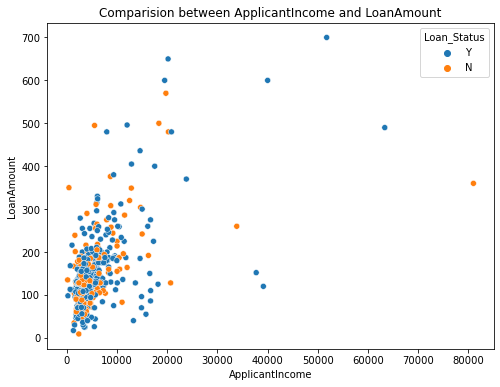

In [41]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status']);

There is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

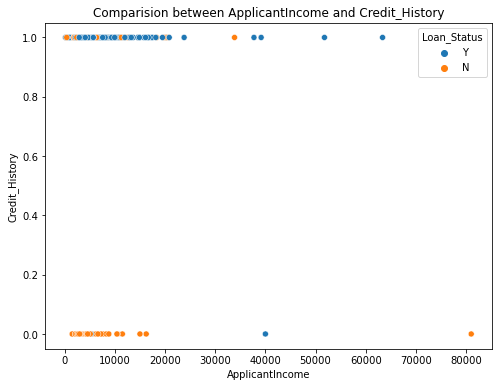

In [42]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status']);

If the applicant has credit history 1 then thechance of getting loan approved is more irrespective of Applicant Income.

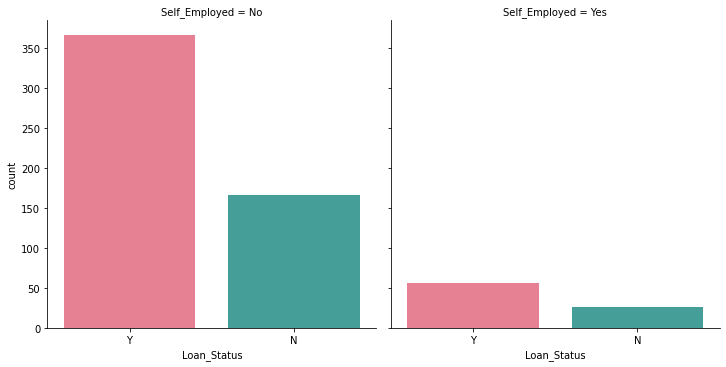

In [43]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

Applicants who are not self employed has more chance of getting loan approved.

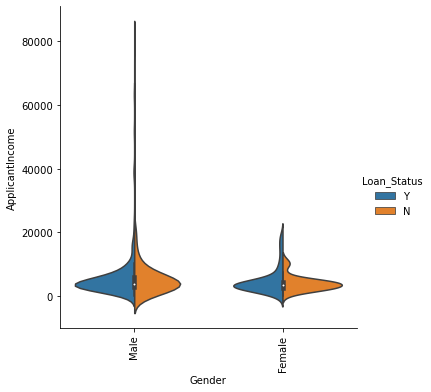

In [44]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Male applicants has chance of getting loan approved.Irrespective of ApplicantIncome.

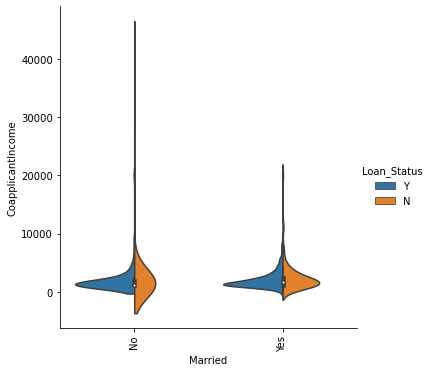

In [45]:
# Let's plot catplot for pair of features
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Married people has more chance of getting loan approved.

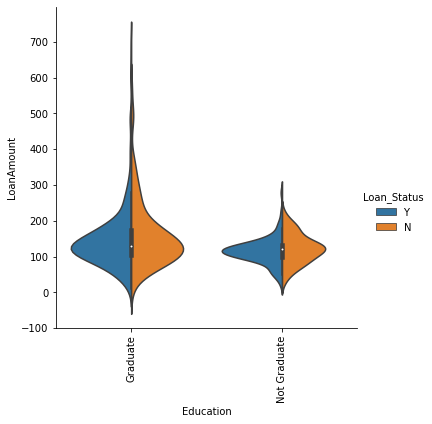

In [46]:
# Let's plot catplot for pair of features
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Graduated people has more chance of getting loan approved.

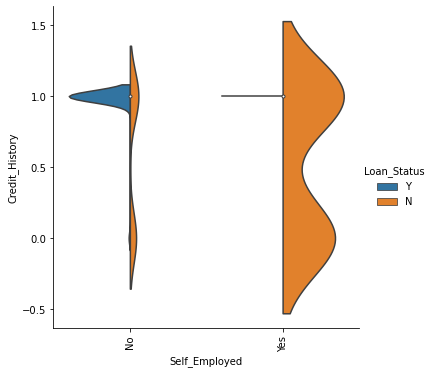

In [47]:
# Let's plot catplot for pair of features
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

There is very less chance of getting loan approved for self employed applicants.

# Multivariate Analysis:

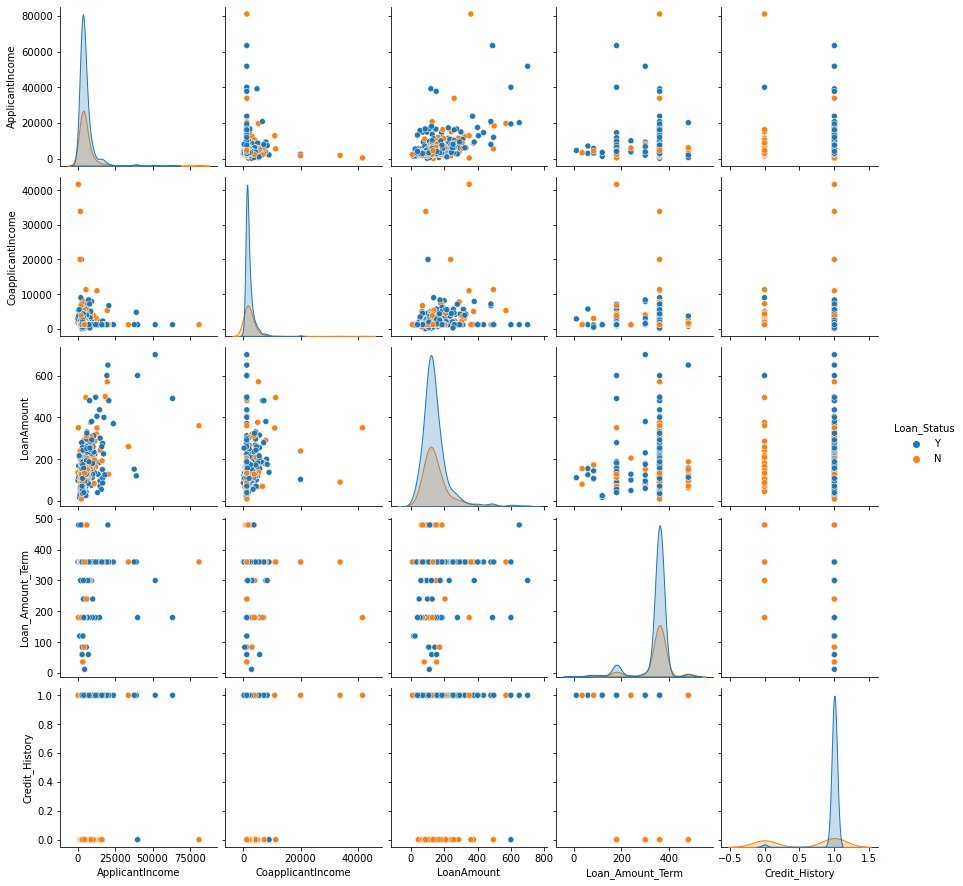

In [48]:
#pair ploting for df
sns.pairplot(df,hue="Loan_Status")

Above is the pair plot for having Laon_Status as target.There are some extreme outliers present in the dataset.

# Data Cleaning:

# Checking for outliers:

<AxesSubplot:>

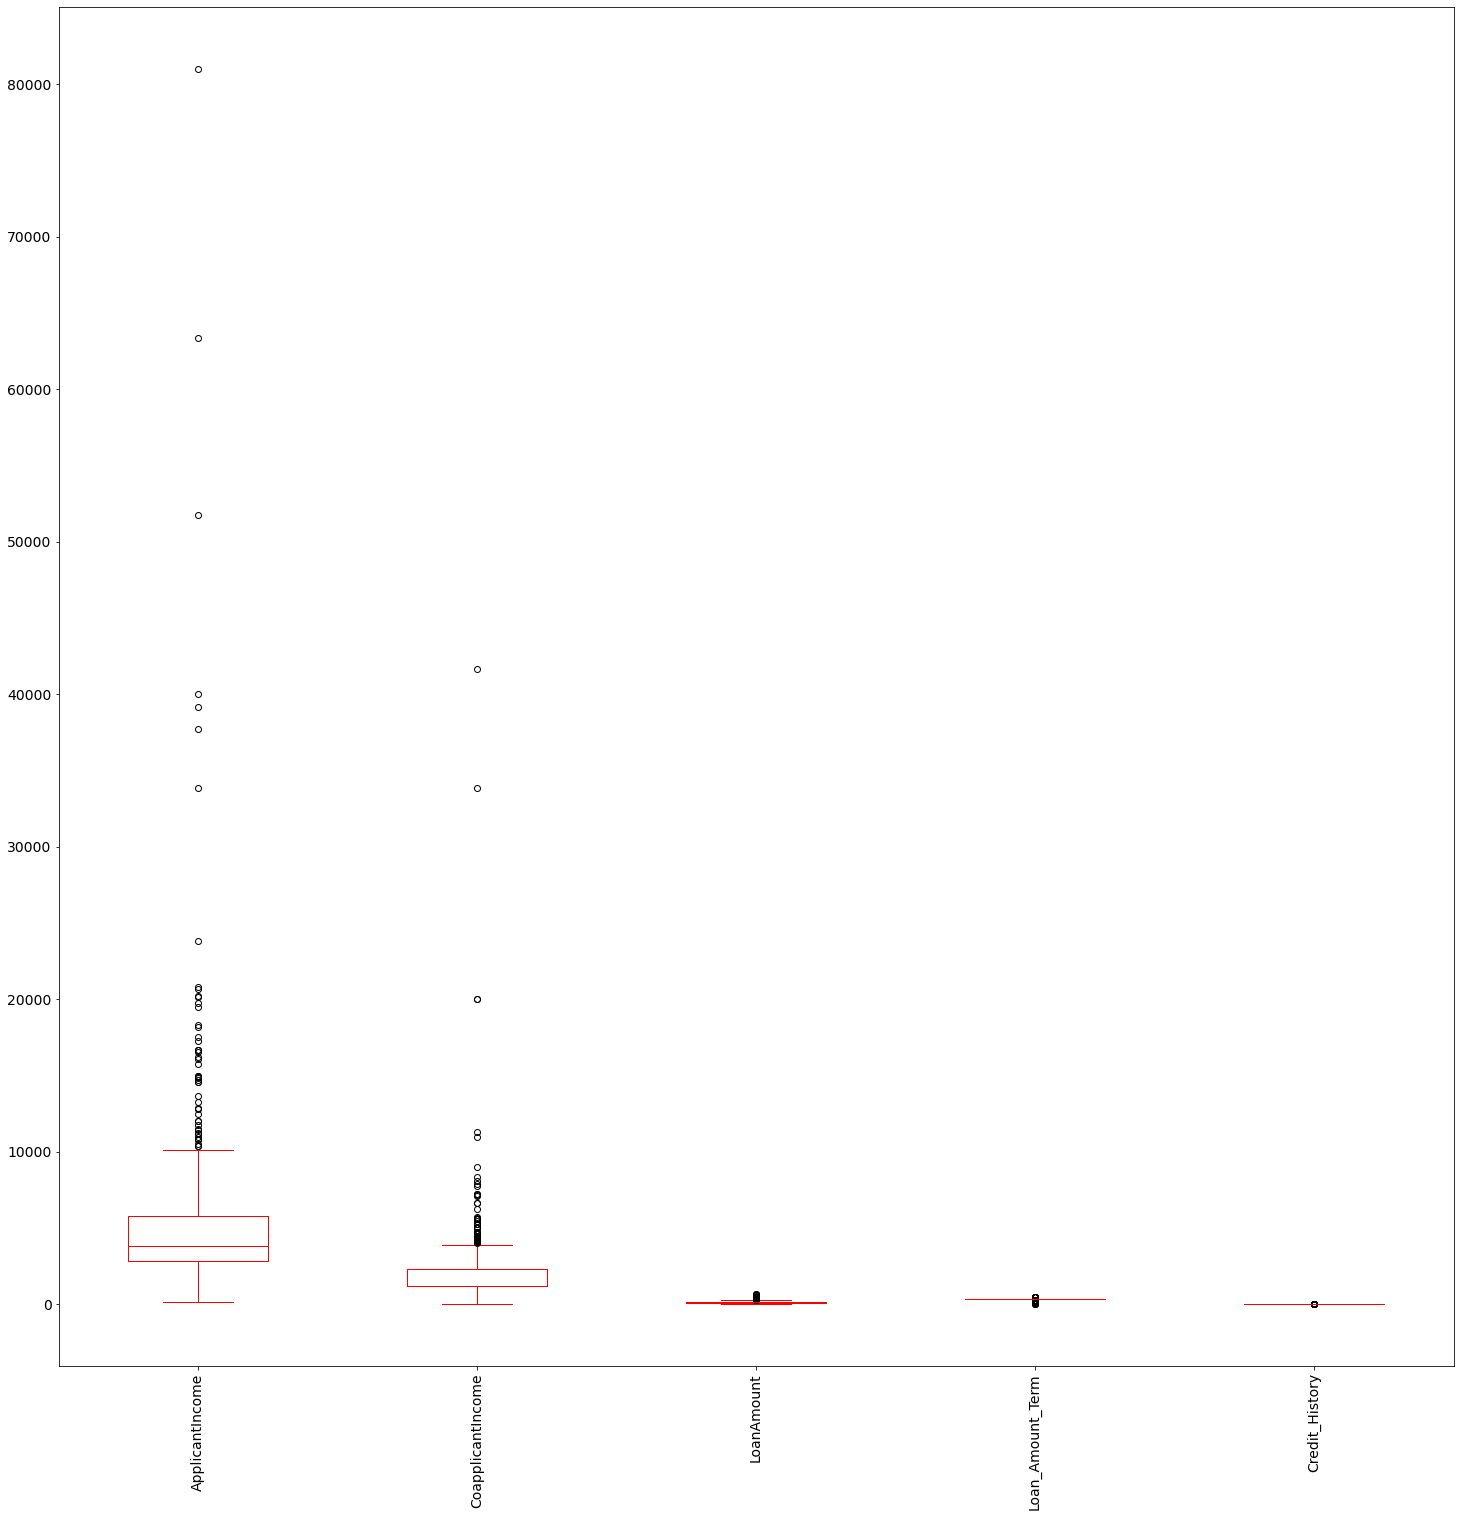

In [49]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

Since **Credit_History,Loan_Amount_Term** is a **Categorical** column no need to remove outliers.In all other 4 numerical columns i have to remove outliers.

# Removing Outliers:

# i) Zscore method:

In [50]:
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

Above are the list of columns with outliers.

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


I have removed the skewness using zscore method.

In [52]:
#Checking shape of new dataset
df_new.shape

(577, 12)

In my new dataset i have 577 rows and 12 columns.

In [53]:
#Checking shape of old dataset
df.shape

(614, 12)

In my old dataset i was having 614 rows and 12 columns.

In [54]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

Using Zscore i have 6.03% data loss.Which is less than 10%.But still let me have a look into IQR method also.

# ii) IQR method:

In [55]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [56]:
#Checking shape of new dataset
df_1.shape

(434, 12)

In my new dataset i have 434 rows and 12 columns.

In [57]:
#Checking shape of old dataset
df.shape

(614, 12)

In my old dataset i was having 614 rows and 12 columns.

In [58]:
#Checking dataloss in IQR
Dataloss = (((614-434)/614)*100)
Dataloss

29.31596091205212

There is a great dataloss in IQR method so let me stick on to zscore method to remove outliers.

# Checking for skewness:

In [59]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    2.326156
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

No need to remove skewness in Credit_History,Loan_Amount_Term since i'm considering it as categorical column.

# Removing skewness using yeo-johnson method:

In [60]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

Taking a list as fea with all the columns with skewness.

In [61]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [62]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [63]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome    0.079601
LoanAmount           0.048425
dtype: float64

Now the skewness is removed.

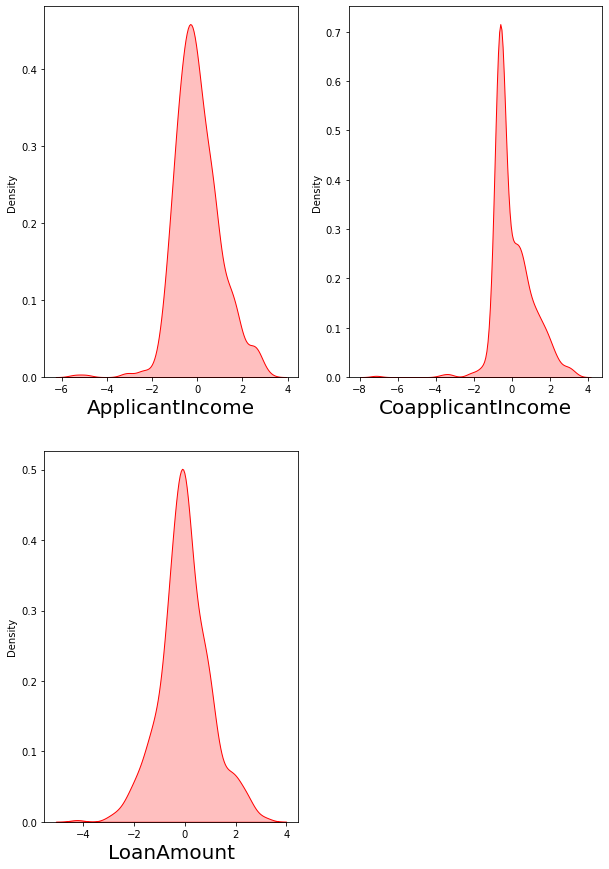

In [64]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It looks like the skewness is removed completely.

# Label Encoding:

In [65]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Above are the list of categorical columns in new dataset.

In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [67]:
df_new[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


Using label encoder i have encoded the categorical columns.

# Checking correlation using heat map:

In [68]:
cor=df_new.corr()

Checking correlation.

In [69]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.137334,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.139109,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,-0.066972,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,-0.060180,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.012839,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.185490,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.137334,0.139109,-0.066972,-0.060180,-0.012839,-0.185490,1.000000,0.304356,-0.068870,-0.032656,-0.082216,0.000762
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.304356,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,-0.068870,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,-0.032656,-0.003626,0.027392,1.000000,-0.008121,0.560936


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

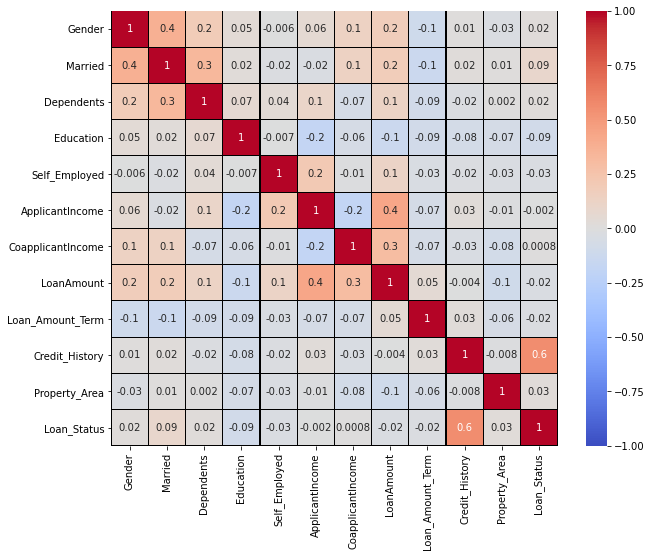

In [70]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

- There is no multicolinearity issue in this dataset.
- I can notice that with target column ApplicantIncome and CoapplicantIncome is very less correlated.
- Let me plot bar plot of target correlation to get better vission.

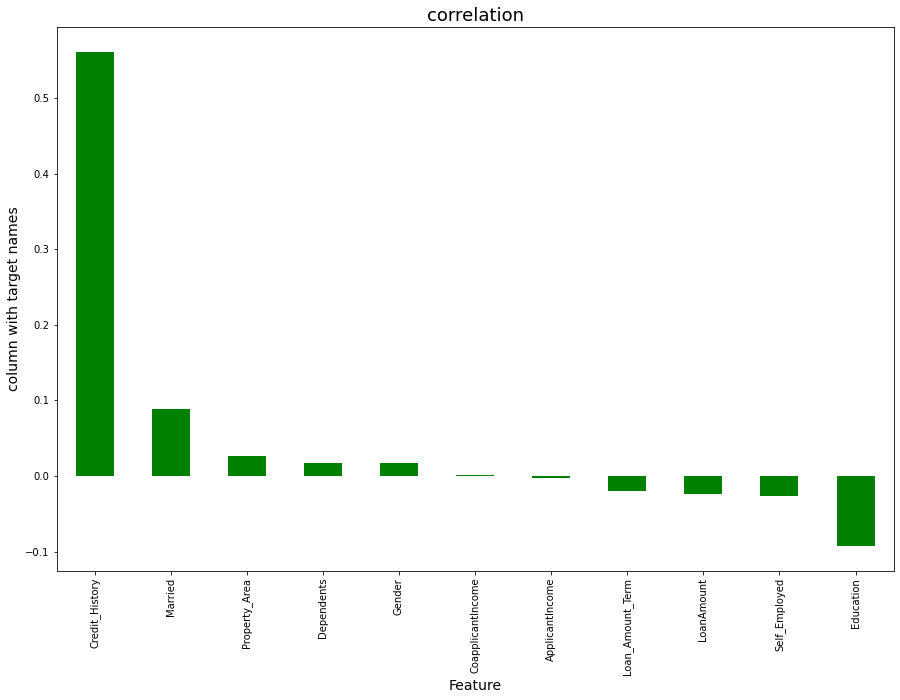

In [71]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

CoapplicanIncome and ApplicantIncome is very less correlated with target column.

In [72]:
#Droping less correlated column
df_new = df_new.drop(["CoapplicantIncome"],axis=1)

# Separating features and label:

In [73]:
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

I have separated my target and independent columns.

# Scaling the data using standard scaler:

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [75]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,0.238260,0.230853,0.418513,1.227472


This is the data of independent variables after scaling.

# Balancing the target variable using oversampling:

In [76]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [78]:
# Checking the value counts again
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

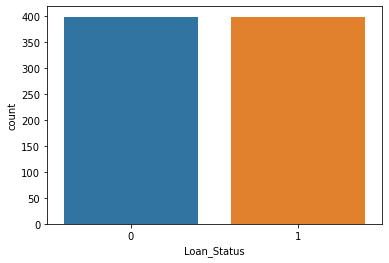

In [79]:
# Visualizing the data after oversampling
sns.countplot(y)

Now the data looks beautifully balanced.

# Finding Best Random State and Accuracy:

In [80]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8744769874476988  on Random_state  68


Got the best accuracy and random state.

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Classification Algorithms:

In [83]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) DecisionTreeClassifier:

In [84]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7949790794979079
Confusion Matrix: [[ 83  19]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       102
           1       0.85      0.78      0.81       137

    accuracy                           0.79       239
   macro avg       0.79      0.80      0.79       239
weighted avg       0.80      0.79      0.80       239



DTC is giving me 78% accuracy.

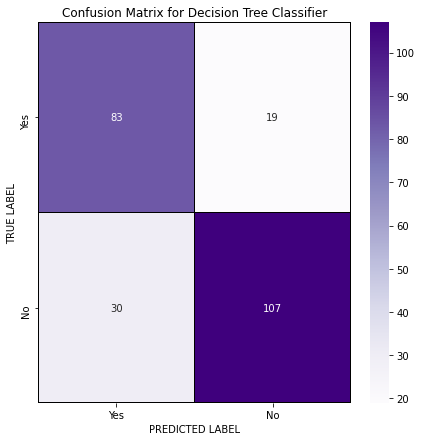

In [85]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

# ii) RandomForestClassifier:

In [86]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8744769874476988
Confusion Matrix: [[ 81  21]
 [  9 128]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       102
           1       0.86      0.93      0.90       137

    accuracy                           0.87       239
   macro avg       0.88      0.86      0.87       239
weighted avg       0.88      0.87      0.87       239



RFC is giving me 87% accuracy.

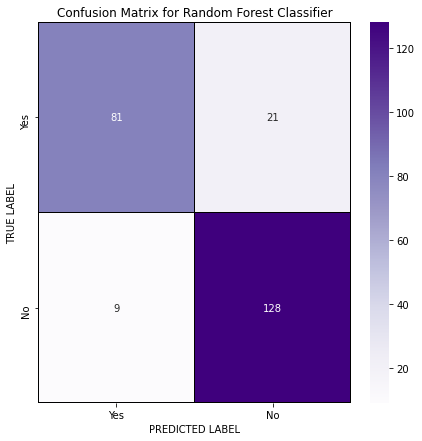

In [87]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iii) SupportVectorClassifier:

In [88]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7698744769874477
Confusion Matrix: [[ 66  36]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       102
           1       0.77      0.86      0.81       137

    accuracy                           0.77       239
   macro avg       0.77      0.75      0.76       239
weighted avg       0.77      0.77      0.77       239



SVC is giving me 78% accuracy.

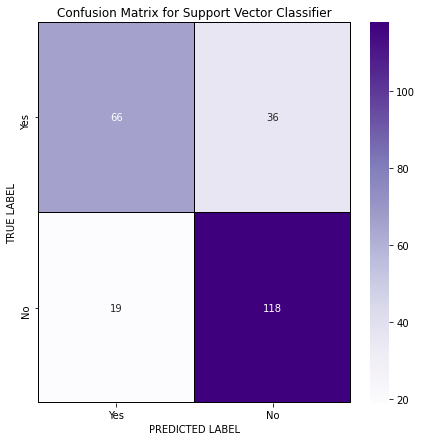

In [89]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier model using confusion matrix.

# iv) K-Neighbor Classifier:

In [90]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.7782426778242678
Confusion Matrix: [[ 77  25]
 [ 28 109]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       102
           1       0.81      0.80      0.80       137

    accuracy                           0.78       239
   macro avg       0.77      0.78      0.77       239
weighted avg       0.78      0.78      0.78       239



KNN is giving me 76% accuracy.

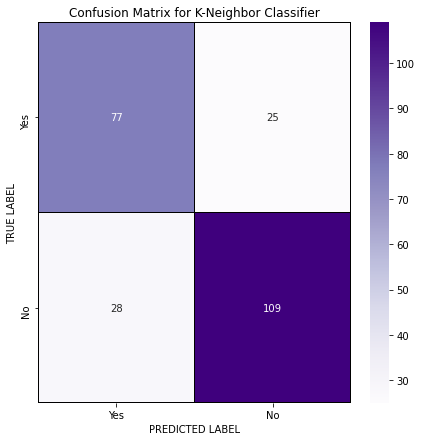

In [91]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in KNN Classifier model using confusion matrix.

# v) Gradient Boosting Classifier:

In [92]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8075313807531381
Confusion Matrix: [[ 69  33]
 [ 13 124]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       102
           1       0.79      0.91      0.84       137

    accuracy                           0.81       239
   macro avg       0.82      0.79      0.80       239
weighted avg       0.81      0.81      0.80       239



GBC is giving me 81% accuracy.

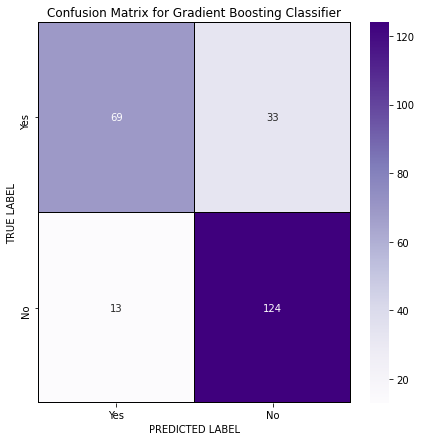

In [93]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

We can see the true values and predicted values in Gradient Boosting Classifier model using confusion matrix.

# vi) XGBClassifier:

In [94]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

[16:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8242677824267782
Confusion Matrix: [[ 80  22]
 [ 20 117]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       102
           1       0.84      0.85      0.85       137

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



XGB is giving me 83% accuracy.

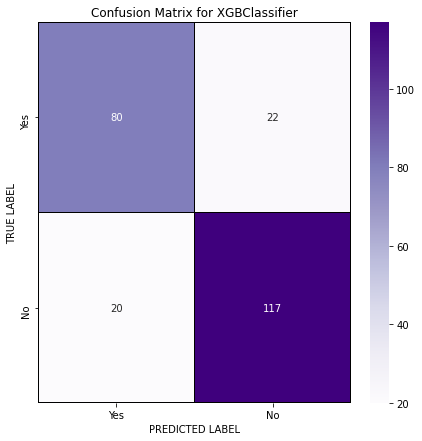

In [95]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# Cross Validation Score:

In [96]:
#Importing library
from sklearn.model_selection import cross_val_score

In [97]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7613679245283018


In [98]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8317531446540881


In [99]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.7387264150943396


In [100]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.729937106918239


In [101]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.7966037735849056


In [102]:
# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Above are the cross validation scores of DTC,RFC,SVC,KNN,GBC and XGB.

By looking into the difference of model accuracy and cross validation score i found the least difference in RFC.So RFC is my best model.

# Hyper Parameter tuning:

In [103]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [104]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

Giving the parameters list for RFC model.

In [105]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

Running grid search CV for RFC.

In [106]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

Training the model with GCV.

In [107]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

Got the best parameters for RFC.

In [113]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

87.86610878661088


In [114]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 0.8786610878661087
Confusion matrix: [[ 81  21]
 [  8 129]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       102
           1       0.86      0.94      0.90       137

    accuracy                           0.88       239
   macro avg       0.89      0.87      0.87       239
weighted avg       0.88      0.88      0.88       239



After tuning the accuracy is same which is 88% it looks good!!!!!

# ROC-AUC curve:

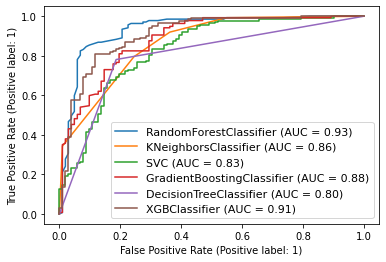

In [115]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

# Saving the model:

In [116]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"LoanPrediction.pkl")

['LoanPrediction.pkl']

I have saved the model as LoanPrediction.

# Predictions:

In [117]:
# Loading the saved model
model=joblib.load("LoanPrediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [118]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,1,0,0,1,1
Actual,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,1


Above are the predicted values and the actual values.They are almost similar.

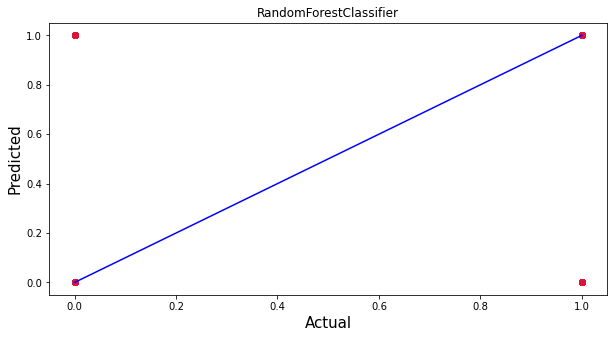

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestClassifier")
plt.show()

Plotting Actual vs Predicted.

# Thank You:) For Evaluating My Project:)